### Loading Dataset

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillage-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Import Libraries

In [12]:
import random
import numpy as np
import tensorflow as tf
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [14]:
print(os.listdir('plantvillage dataset'))
print(len(os.listdir('plantvillage dataset/segmented')))
print(len(os.listdir('plantvillage dataset/color')))
print(len(os.listdir('plantvillage dataset/grayscale')))

['segmented', 'grayscale', 'color']
38
38
38


### Data preprocessing

In [15]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


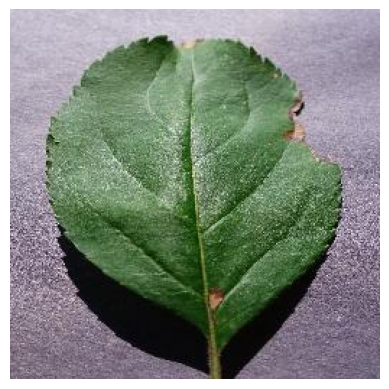

In [16]:
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/01e94c43-0879-4e8c-9b61-c48cfed88dab___JR_FrgE.S 3024.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
#parameters
img_size = 224
batch_size = 32

### Train Test split

In [18]:
#data augmentation
data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [20]:
train_generator = data_generator.flow_from_directory(
    base_dir,
    target_size= (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode= 'categorical'
)
valid_generator = data_generator.flow_from_directory(
    base_dir,
    target_size= (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode= 'categorical'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


### CNN Architecture

In [23]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu', input_shape= (img_size, img_size, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation= 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256, activation= 'relu'))
model.add(Dense(train_generator.num_classes, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics= ['accuracy'])

### Model Training

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs= 5,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 108s 74ms/step - accuracy: 0.5855 - loss: 2.0293 - val_accuracy: 0.8335 - val_loss: 0.5323
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.8930 - loss: 0.3397 - val_accuracy: 0.8588 - val_loss: 0.4555
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 69ms/step - accuracy: 0.9533 - loss: 0.1457 - val_accuracy: 0.8507 - val_loss: 0.5573
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.9723 - loss: 0.0879 - val_accuracy: 0.8801 - val_loss: 0.4569
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.9799 - loss: 0.0633 - val_accuracy: 0.8621 - val_loss: 0.5987


### Model Evaluation

In [28]:
val_loss, val_accuracy= model.evaluate(valid_generator, steps= valid_generator.samples // batch_size)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

339/339 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.8627 - loss: 0.5963
Validation accuracy: 86.20%


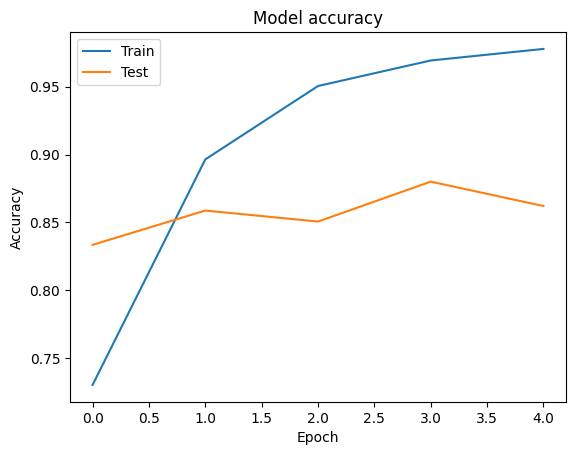

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

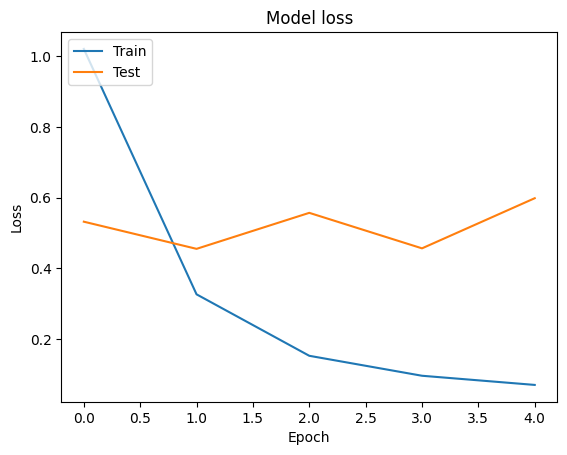

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Predictive System

In [31]:
def load_preprocess(image_path, target_size=(224,224)):
  img = Image.open(image_path)
  img = img.resize(target_size)
  img_array= np.array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array.astype('float32') / 255.
  return img_array


In [32]:
def predict_class(model, image_path, class_indices):
  preprocessed_img = load_preprocess(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_index = np.argmax(predictions, axis =1)[0]
  predicted_class = class_indices[predicted_index]
  return predicted_class

In [33]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [34]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [37]:
image_path1 = '/content/plantvillage dataset/color/Blueberry___healthy/011405e4-a92a-44b6-9f04-10fec28d93f5___RS_HL 2311.JPG'
predicted = predict_class(model, image_path1, class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [38]:
print("Predicted Class Name: ", predicted)

Predicted Class Name:  Blueberry___healthy
